In [1]:
import pandas as pd
import numpy as np

In [2]:
content=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\Accenture\\Content.csv')
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [3]:
reaction=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\Accenture\\Reactions.csv')
reaction.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [4]:
reaction_type=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\Accenture\\ReactionTypes.csv')
reaction_type.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [5]:
print("Content", content.shape)
print("Reactions", reaction.shape)
print("Reaction_Types", reaction_type.shape)

Content (1000, 6)
Reactions (25553, 5)
Reaction_Types (16, 4)


### Missing values

In [6]:
content.isna().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

#### URL and Unnamed: 0 and User Id  is not needed for our analysis, lets drop these columns

In [7]:
content.drop(['URL', 'Unnamed: 0','User ID'] ,axis=1, inplace=True)
content.isna().sum()

Content ID    0
Type          0
Category      0
dtype: int64

In [8]:
reaction.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [9]:
reaction.drop(['Unnamed: 0','User ID'], axis=1, inplace=True)
reaction.dropna(axis=0, inplace=True)
reaction.isna().sum()

Content ID    0
Type          0
Datetime      0
dtype: int64

In [10]:
reaction.shape

(24573, 3)

In [11]:
reaction_type.isna().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [12]:
reaction_type.drop('Unnamed: 0', axis=1, inplace=True)
reaction_type.columns

Index(['Type', 'Sentiment', 'Score'], dtype='object')

### In Content Table the column "Type" represent "Content Type" and in Reaction table the column "Type" represent "Reaction Type" so change the column names.

In [13]:
content.rename({'Type':'Content_Type'}, axis=1, inplace=True)
content.columns

Index(['Content ID', 'Content_Type', 'Category'], dtype='object')

In [14]:
reaction.rename({'Type':'Reaction_Type'}, axis=1, inplace=True)
reaction.columns

Index(['Content ID', 'Reaction_Type', 'Datetime'], dtype='object')

In [15]:
reaction_type.rename({'Type':'Reaction_Type'}, axis=1, inplace=True)
reaction_type.columns

Index(['Reaction_Type', 'Sentiment', 'Score'], dtype='object')

### Unique Values in Each Categorical column

In [16]:
content['Content_Type'].unique()

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [17]:
reaction['Reaction_Type'].unique()

array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'love', 'indifferent', 'super love', 'intrigued',
       'worried', 'like', 'heart', 'want', 'adore'], dtype=object)

In [18]:
reaction_type['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [19]:
reaction_type['Reaction_Type'].unique()

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [20]:
content['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

### In the Content Type Some Categories are enclosed in Double Qotes  and Some are the repeated values, lets change these values

In [21]:
content['Category'].replace({'healthy eating':'Healthy Eating',
                             '"culture"':'Culture',
                             'culture':'Culture',
                             'technology':'Technology',
                             '"technology"':'Technology',
                             'food':'Food',
                             '"food"':'Food',
                            '"studying"':'Studying',
                             'studying':'Studying',
                            '"animals"':'Animals',
                             'animals':'Animals',
                            'soccer':'Soccer',
                             '"soccer"':'Soccer',
                            '"cooking"':'Cooking',
                             'cooking':'Cooking',
                            '"dogs"':'Dogs',
                            'dogs':'Dogs',
                             'public speaking':'Public Speaking',
                             '"public speaking"':'Public Speaking',
                             'science':'Science',
                             '"science"':'Science',
                             '"tennis"':'Tennis',
                             'tennis':'Tennis',
                             'travel':'Travel',
                             'fitness':'Fitness',
                             'education':'Education',
                             'veganism':'Veganism',
                             '"veganism"':'Veganism'
                            },inplace=True)
content['Category'].unique()

array(['Studying', 'Healthy Eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

### First merge Content and Reaction Dataframe on the basic of User_ID, then merge resultant Dataframe with Reaction type on the basis of Reaction Type.

In [22]:
res=pd.merge(content, reaction, on='Content ID', how='inner')
res.head()

,Content ID,Content_Type,Category,Reaction_Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2021-06-17 12:22:51
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,scared,2021-04-18 05:13:58
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,interested,2020-08-23 12:25:58


In [23]:
res.shape

(24573, 5)

In [24]:
res['Category'].unique()

array(['Studying', 'Healthy Eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

In [25]:
df=pd.merge(res, reaction_type, on='Reaction_Type', how='inner')
df.head()

,Content ID,Content_Type,Category,Reaction_Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,Healthy Eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,Healthy Eating,disgust,2020-08-04 05:40:33,negative,0


In [26]:
res.shape

(24573, 5)

In [27]:
res.isna().sum()

Content ID       0
Content_Type     0
Category         0
Reaction_Type    0
Datetime         0
dtype: int64

In [28]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Content_Type   24573 non-null  object
 2   Category       24573 non-null  object
 3   Reaction_Type  24573 non-null  object
 4   Datetime       24573 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [29]:
#df.to_csv('cleaned_data.csv')

### Total Score for Each category

In [30]:
pd.pivot_table(df, index='Category', values='Score', aggfunc='sum').sort_values(by='Score', ascending=False)

,Score
Category,
Animals,74965
Science,71168
Healthy Eating,69339
Technology,68738
Food,66676
Culture,66579
Travel,64880
Cooking,64756
Soccer,57783


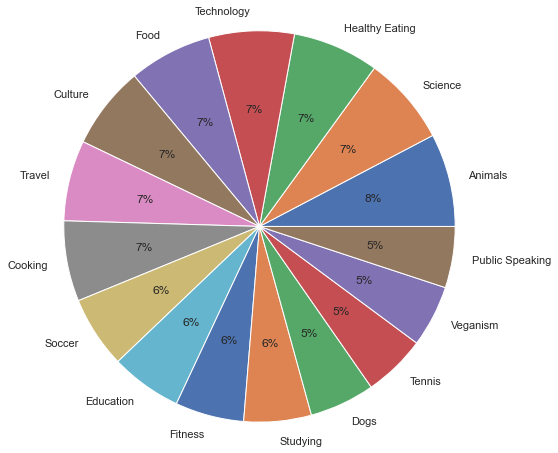

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
cat=pd.pivot_table(df, index='Category', values='Score', aggfunc='sum').sort_values(by='Score', ascending=False)
cat.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(20,6)})
plt.pie(data=cat, x='Score', labels='Category', autopct='%1.0f%%', radius=1.5);
plt.savefig('pie.jpg')

### Top 5 Categories By Score

In [32]:
top_5=pd.pivot_table(df, index='Category', values='Score', aggfunc='sum').sort_values(by='Score', ascending=False)[:5]
top_5

,Score
Category,
Animals,74965
Science,71168
Healthy Eating,69339
Technology,68738
Food,66676


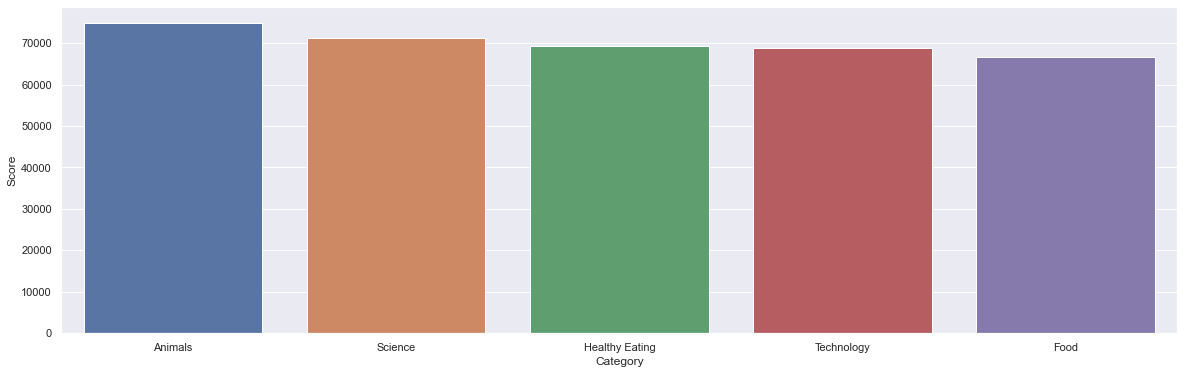

In [33]:
top_5.reset_index(inplace=True)
sns.barplot(x='Category', y='Score', data=top_5);

### On which Month most Content has been posted

In [52]:
df['Datetime']=pd.to_datetime(df['Datetime'])
df['Month']=df['Datetime'].dt.month
df['Month'].value_counts()

5     2138
1     2126
8     2114
12    2092
7     2070
10    2056
11    2034
9     2022
6     2021
3     2012
4     1974
2     1914
Name: Month, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


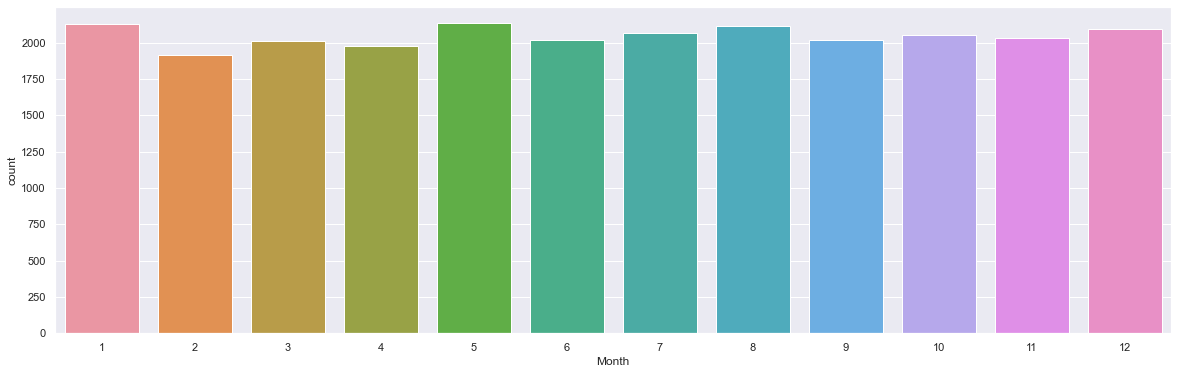

In [50]:
sns.countplot(df['Month']);

### Which content type is used frequently

In [51]:
df['Content_Type'].value_counts()

photo    6589
video    6245
GIF      6079
audio    5660
Name: Content_Type, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


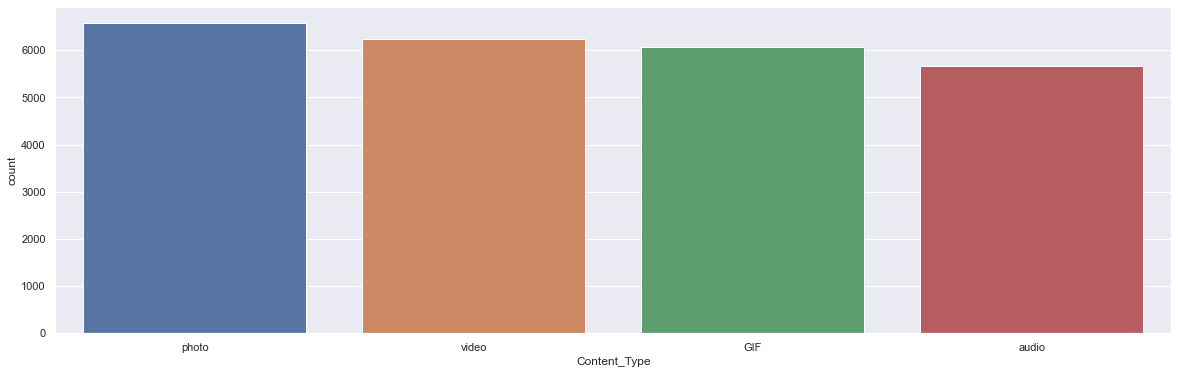

In [54]:
sns.countplot(df['Content_Type']);